<a href="https://colab.research.google.com/github/lalemos1/California-ZEV-Survey-Analysis/blob/main/Lucas_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Read in csv file
data = pd.read_csv('CA_ZEV_Survey_12-07-20.csv')

# Select data for has EV, has FCV, and has neither
envCare = data["Urgent national need (trunc)"]
hasEV = data["Consider an EV"] == "I (we) already have a vehicle powered by electricity"
envCareEV = envCare[hasEV].dropna()

hasFCV = data["Consider an FCV"] == "I (we) already have a vehicle powered by hydrogen"
envCareFCV = envCare[hasFCV].dropna()

envCareNeither = envCare[(hasFCV == False) & (hasEV == False)].dropna()

<function matplotlib.pyplot.show(close=None, block=None)>

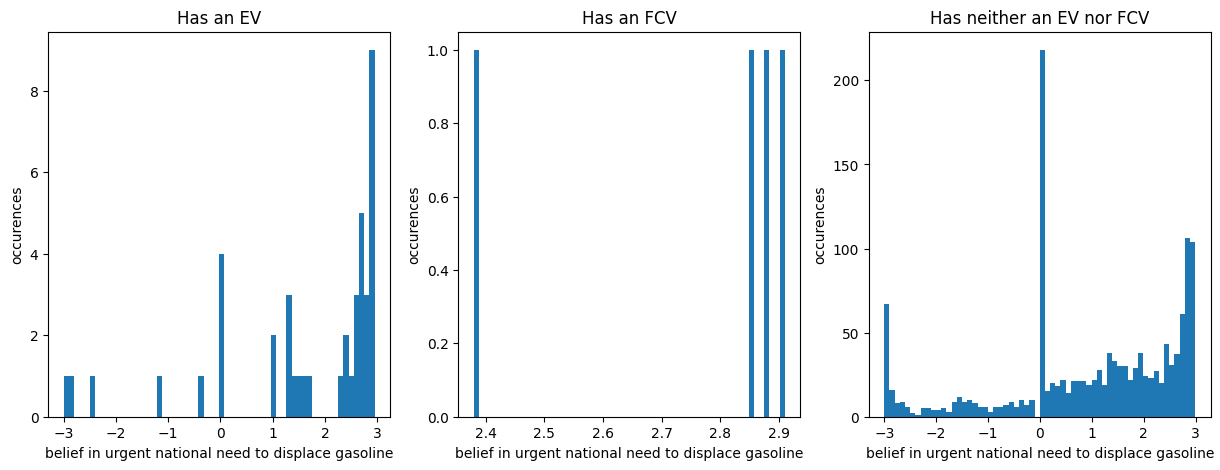

In [3]:
#Plot histograms
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

numBins = 60

ax[0].hist(envCareEV, numBins)
ax[0].set_title("Has an EV")
ax[0].set_xlabel("belief in urgent national need to displace gasoline")
ax[0].set_ylabel("occurences")

ax[1].hist(envCareFCV, numBins)
ax[1].set_title("Has an FCV")
ax[1].set_xlabel("belief in urgent national need to displace gasoline")
ax[1].set_ylabel("occurences")

ax[2].hist(envCareNeither, numBins)
ax[2].set_title("Has neither an EV nor FCV")
ax[2].set_xlabel("belief in urgent national need to displace gasoline")
ax[2].set_ylabel("occurences")

plt.show

In [4]:
# Display mean and standard deviation

# EVs
print('Mean of EVs is {:.3}'.format(envCareEV.mean()))
print("Standard deviation is {:.3}".format(envCareEV.std()))

t_val, p_val = stats.ttest_ind(envCareEV, envCareNeither)
print('t statistic = {:.4}'.format(t_val))
print('p value = {:.3}'.format(p_val))

print()

# FCVs
print("Mean of FCVs is {:.3}".format(envCareFCV.mean()))
print("Standard deviation is {:.3}".format(envCareFCV.std()))

t_val, p_val = stats.ttest_ind(envCareFCV, envCareNeither)
print('t statistic = {:.4}'.format(t_val))
print('p value = {:.3}'.format(p_val))

print()

# Neither
print("Mean of Neither is {:.3}".format(envCareNeither.mean()))
print("Standard deviation is {:.3}".format(envCareNeither.std()))

Mean of EVs is 1.62
Standard deviation is 1.65
t statistic = 2.577
p value = 0.0101

Mean of FCVs is 2.75
Standard deviation is 0.251
t statistic = 2.148
p value = 0.0319

Mean of Neither is 0.931
Standard deviation is 1.7
